In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, model_selection, metrics, pipeline, tree, ensemble, neighbors, svm
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [3]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [6]:
np.min(df_train.values), np.max(df_train.values)

(0, 255)

In [13]:
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255

y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

In [7]:
28 * 28

784

In [10]:
X_train.shape

(60000, 784)

In [12]:
X_train[0].reshape((28, 28)).shape

(28, 28)

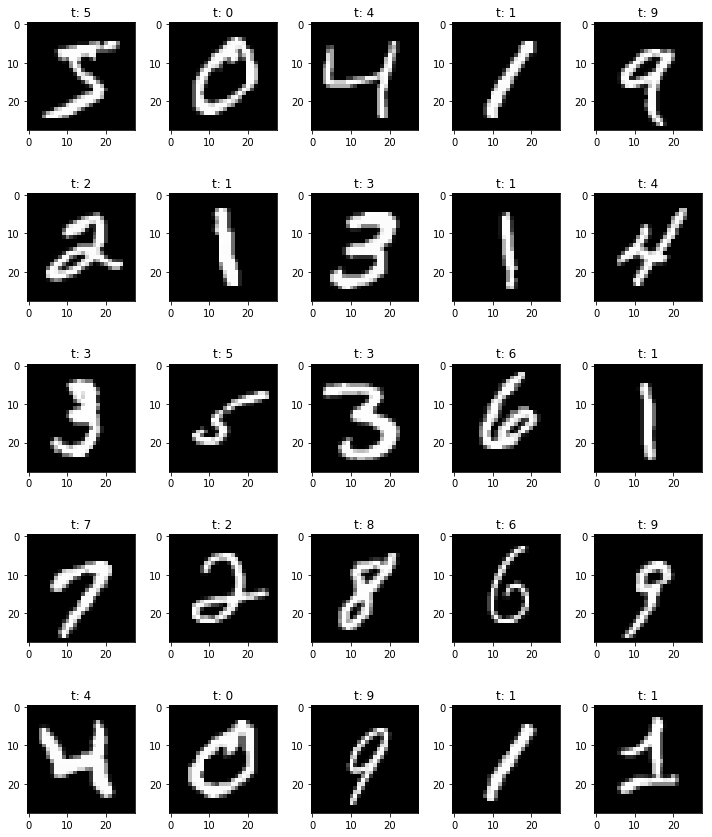

In [20]:
fig, axes = plt.subplots(5, 5, figsize = (10, 12))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap="gray")
    ax.set_title("t: %d" % (y_train[i]))
plt.tight_layout()

In [22]:
%%time 

est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))


Accuracy: 0.908200
CPU times: user 12.4 s, sys: 279 ms, total: 12.7 s
Wall time: 5.78 s


In [23]:
wrong_predictions = y_test != y_test_pred

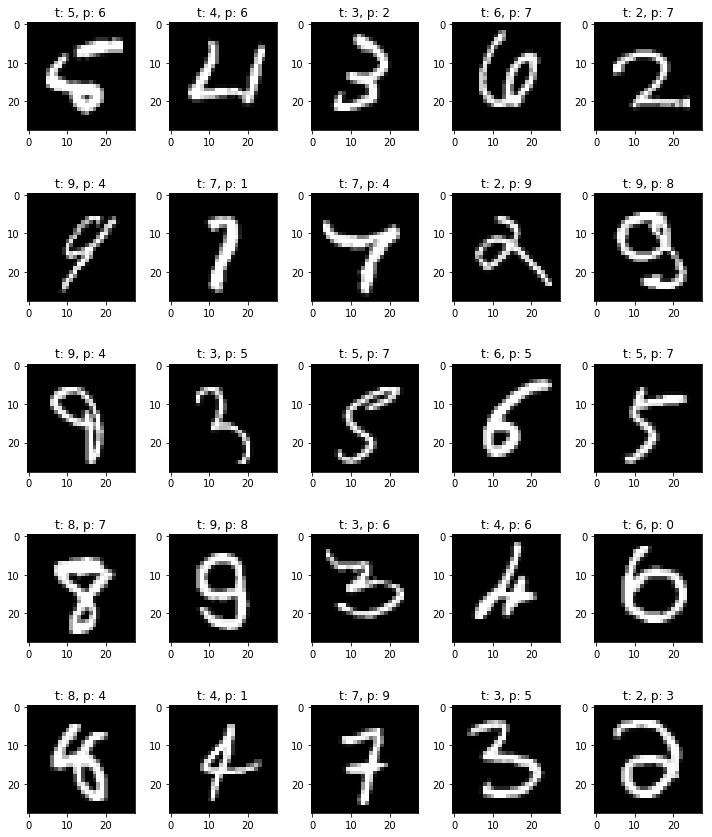

In [26]:
fig, axes = plt.subplots(5, 5, figsize = (10, 12))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[wrong_predictions][i].reshape((28, 28)), cmap="gray")
    ax.set_title("t: %d, p: %d" % (y_test[wrong_predictions][i]
                                   , y_test_pred[wrong_predictions][i]))
plt.tight_layout()

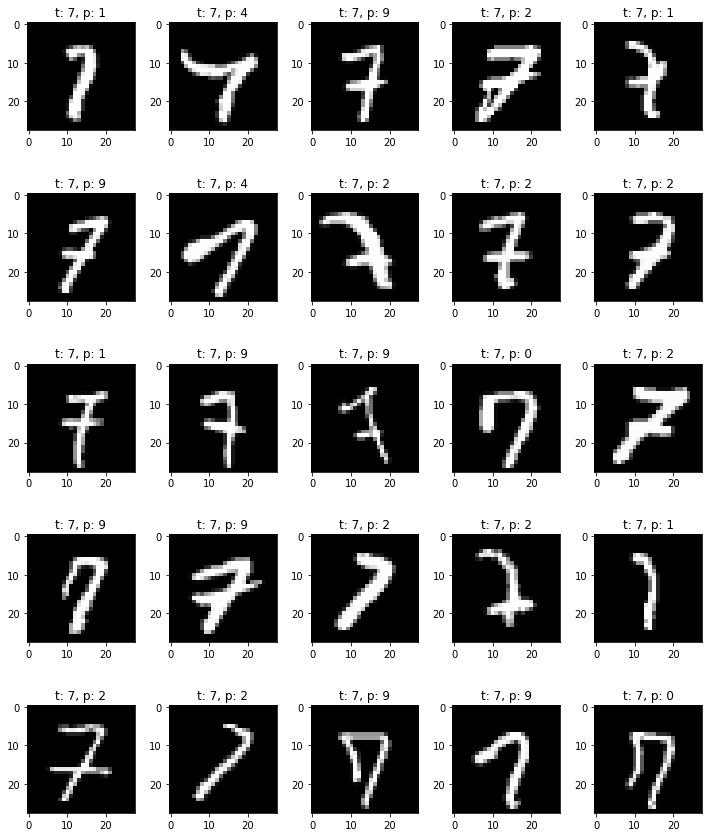

In [28]:
fig, axes = plt.subplots(5, 5, figsize = (10, 12))
for i, ax in enumerate(fig.axes):
    target = 7
    ax.imshow(X_test[wrong_predictions & (y_test == target)][i].reshape((28, 28)), cmap="gray")
    ax.set_title("t: %d, p: %d" % (y_test[wrong_predictions & (y_test == target)][i]
                                   , y_test_pred[wrong_predictions & (y_test == target)][i]))
plt.tight_layout()

In [34]:
result = pd.DataFrame({"t": y_test, "p": y_test_pred, "v": 1})[wrong_predictions]

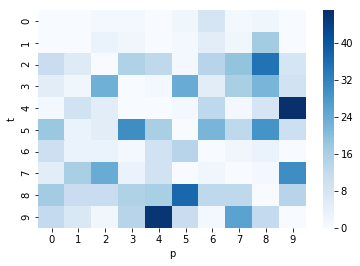

In [42]:
sns.heatmap(result.pivot_table("v", "t", "p", aggfunc=np.sum).fillna(0), cmap=plt.cm.Blues)

In [40]:
import seaborn as sns

In [44]:
est.coef_.shape

(10, 784)

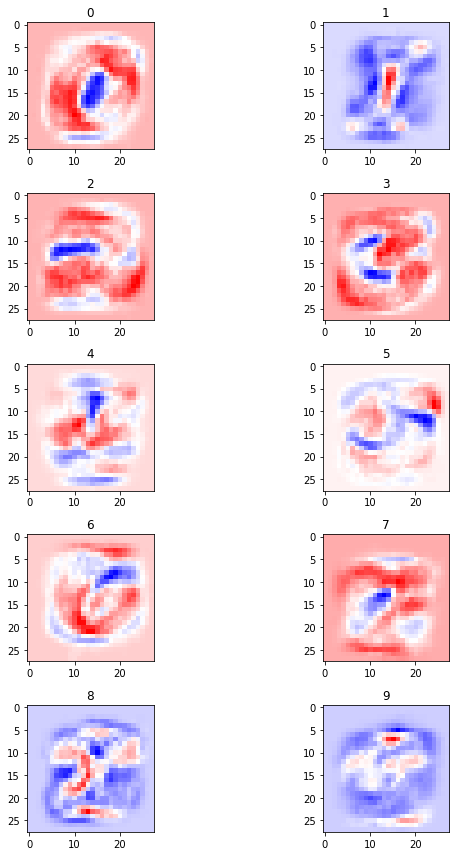

In [50]:
weights = est.coef_
fig, axes = plt.subplots(5, 2, figsize = (10, 12))
for i, ax in enumerate(fig.axes):
    ax.imshow(weights[i].reshape((28, 28)), cmap = "bwr")
    ax.set_title(i)
plt.tight_layout()

(array([ 12.,  10.,   7.,  15.,  51., 183., 366.,  63.,  52.,  25.]),
 array([-0.20960858, -0.17703458, -0.14446058, -0.11188659, -0.07931259,
        -0.04673859, -0.01416459,  0.01840941,  0.0509834 ,  0.0835574 ,
         0.1161314 ]),
 <a list of 10 Patch objects>)

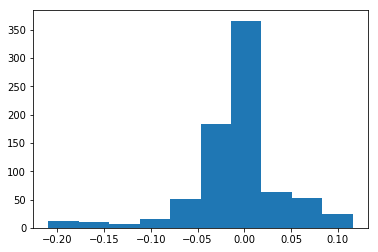

In [51]:
plt.hist(weights[0])

In [52]:
%%time 
est = tree.DecisionTreeClassifier(random_state=1, max_depth=10)
est.fit(X_train, y_train)
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))

Accuracy: 0.865300
CPU times: user 7.51 s, sys: 178 ms, total: 7.69 s
Wall time: 7.71 s
